# Assignment 1

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Classification using KNN

Let's set up our workspace and use the **Wine dataset** from `scikit-learn`. This dataset contains 178 wine samples with 13 chemical features, used to classify wines into different classes based on their origin.

The **response variable** is `class`, which indicates the type of wine. We'll use all of the chemical features to predict this response variable.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Bind the 'class' (wine target) to the DataFrame
wine_df['class'] = wine_data.target

# Display the DataFrame
wine_df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


#### **Question 1:** 
#### Data inspection

Before fitting any model, it is essential to understand our data. **Use Python code** to answer the following questions about the **Wine dataset**:

_(i)_ How many observations (rows) does the dataset contain?

In [3]:
# Your answer here
num_rows = wine_df.shape[0]  #shape[0] for rows
print(f"Number of rows: {num_rows}")


Number of rows: 178


_(ii)_ How many variables (columns) does the dataset contain?

In [4]:
# Your answer here
num_cols = wine_df.shape[1]  #shape[1] for columns
print(f"Number of columns: {num_cols}")


Number of columns: 14


In [5]:
# Summary of wine_data
wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

_(iii)_ What is the 'variable type' of the response variable `class` (e.g., 'integer', 'category', etc.)? What are the 'levels' (unique values) of the variable?

In [8]:
# Your answer here
class_type = wine_df.dtypes['class']
print(f"variable type of class is: {class_type}")

class_unique_vals = wine_df['class'].unique()
print(f"unique values in class is: {class_unique_vals}")

variable type of class is: int32
unique values in class is: [0 1 2]



_(iv)_ How many predictor variables do we have (Hint: all variables other than `class`)? 

In [9]:
# Your answer here
num_predictors = wine_df.drop('class', axis=1).shape[1] #dropping class column as its a response variable and extracting column count which is shape[1]

print(f"The number of predictor variables is: {num_predictors}")

The number of predictor variables is: 13


In [17]:
100 * wine_df.groupby("class").size() / wine_df.shape[0] #checking to see if dataset is imbalanced

class
0    33.146067
1    39.887640
2    26.966292
dtype: float64

You can use `print()` and `describe()` to help answer these questions.

#### **Question 2:** 
#### Standardization and data-splitting

Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the scaler method, provided as follows:

In [10]:
# Select predictors (excluding the last column)
predictors = wine_df.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

(i) Why is it important to standardize the predictor variables?

> Your answer here...

Standardizing predictor variables is important because it puts all features on the same scale, preventing any one feature from dominating just because its numbers are bigger. This helps the model work better and find patterns more efficiently. For models that rely on distances, like K-Nearest Neighbors, standardization ensures that all features are treated fairly in the calculations. It also keeps regularization penalties balanced, so no feature is unfairly reduced in importance. Overall, it makes features easier to compare and helps the model produce more accurate and fair results.

(ii) Why did we elect not to standard our response variable `Class`?

> Your answer here...

The response variable usually represents something concrete, like price, weight, or a simple yes or no. Keeping it in its original form helps make the predictions easier to understand.

In this assignment, I'm building a model to classify different types of wine based on features like alcohol content, magnesium levels, flavanoids, and nonflavanoid phenols. The response variable here is the wine class, which I want to keep as either 0, 1, or 2. This way, we clearly identify the type of wine, which is how people generally think about buying wine. If I were to standardize the class, I’d lose that clarity and might end up with something confusing like “wine type 0.4” instead of a straightforward “wine type 1.” By keeping the class as it is, I can easily share the results with my peers, making sure everyone understands the predictions in a way that makes sense. While standardizing the features helps the model perform better, keeping the wine class in its original form makes the results clear and meaningful.


(iii) A second essential step is to set a random seed. Do so below (Hint: use the random.seed function). Why is setting a seed important? Is the particular seed value important? Why or why not?

> Your answer here...

To put it simply, setting a random seed is super important because it makes sure that your experiments can be repeated reliably. The actual number you pick as your seed isn’t a big deal. what’s important is using the same one each time you run your code. This way, you’ll get the same results every time, which helps you check your work and see how things compare.

(iv) A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. 

Extend the code to create a non-overlapping test set for the predictors and response variables.

In [12]:
# Do not touch
np.random.seed(123)
# Create a random vector of True and False values to split the data
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# Split dataset to training and test sets of predictors and response variable:
X_train =  predictors_standardized[split]  #Training data for predictors
X_test  =  predictors_standardized[~split] #Test data for predictors

# Split the response variable ('class') into training and test sets
y_train = wine_df.loc[split, 'class']  # Training set for the response (class)
y_test = wine_df.loc[~split, 'class']  # Test set for the response (class)

# Print shapes of training and test sets
print(f"Training set (predictors) shape: {X_train.shape}")
print(f"Test set (predictors) shape: {X_test.shape}")
print(f"Training set (response) shape: {y_train.shape}")
print(f"Test set (response) shape: {y_test.shape}")


Training set (predictors) shape: (140, 13)
Test set (predictors) shape: (38, 13)
Training set (response) shape: (140,)
Test set (response) shape: (38,)


#### **Question 3:**
#### Model initialization and cross-validation
We are finally set to fit the KNN model. 


Perform a grid search to tune the `n_neighbors` hyperparameter using 10-fold cross-validation. Follow these steps:

1. Initialize the KNN classifier using `KNeighborsClassifier()`.
2. Define a parameter grid for `n_neighbors` ranging from 1 to 50.
3. Implement a grid search using `GridSearchCV` with 10-fold cross-validation to find the optimal number of neighbors.
4. After fitting the model on the training data, identify and return the best value for `n_neighbors` based on the grid search results.

In [13]:
# Your code here...
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for n_neighbors, ranging from 1 to 50
param_grid = {'n_neighbors': list(range(1, 51))}

# Implement a grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the model on the training data (X_train and y_train)
grid_search.fit(X_train, y_train)

# Identify and return the best value for n_neighbors based on grid search results
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

# Print the best number of neighbors and the corresponding score
print(f"The best value for n_neighbors is: {best_n_neighbors}")
print(f"The best cross-validated accuracy score is: {best_score:.4f}")


The best value for n_neighbors is: 8
The best cross-validated accuracy score is: 0.9786


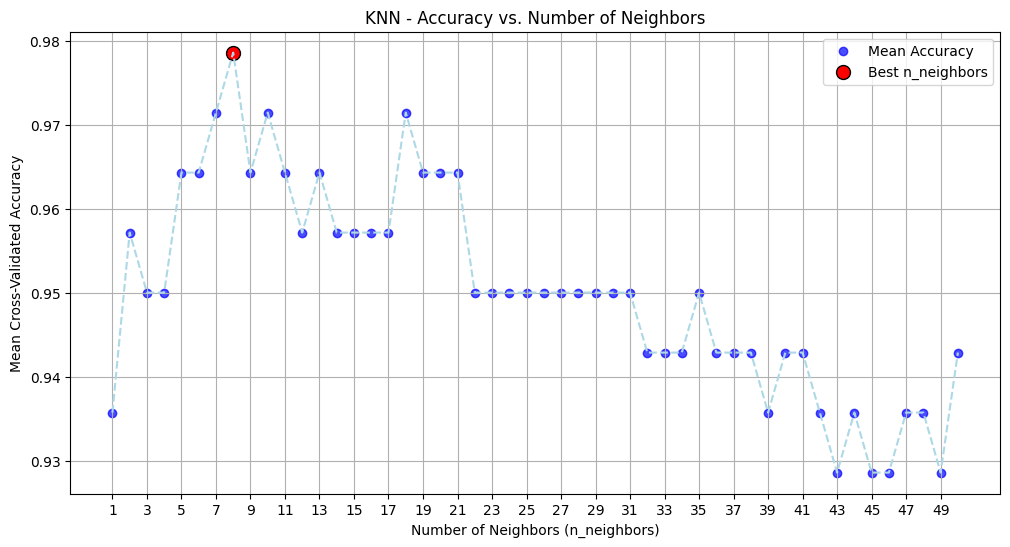

In [16]:
import matplotlib.pyplot as plt

# Get the results from the grid search
results = grid_search.cv_results_

# Extract the mean test scores and the parameter values
mean_scores = results['mean_test_score']
n_neighbors = results['param_n_neighbors'].data  # Getting the values of n_neighbors

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(n_neighbors, mean_scores, color='blue', label='Mean Accuracy', alpha=0.7)

# Add a line connecting the points
plt.plot(n_neighbors, mean_scores, color='lightblue', linestyle='--')

# Highlight the best n_neighbors
plt.scatter(best_n_neighbors, mean_scores[best_n_neighbors-1], color='red', s=100, label='Best n_neighbors', edgecolor='black')

# Title and labels
plt.title('KNN - Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(range(1, 51, 2))  # Set x ticks to show every second number for better visibility
plt.grid()

# Show legend
plt.legend()

# Display the plot
plt.show()




#### **Question 4:**
#### Model evaluation

Using the best value for `n_neighbors`, fit a KNN model on the training data and evaluate its performance on the test set using `accuracy_score`.

In [34]:
# Your code here...

# Assume best_n_neighbors is obtained from your grid search
best_n_neighbors = 8  # Replace with the best n_neighbors found

# Initialize the KNN model
model = KNeighborsClassifier(n_neighbors=best_n_neighbors)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy of KNN model with n_neighbors={best_n_neighbors}: {accuracy:.4f}')

Accuracy of KNN model with n_neighbors=8: 0.9474


# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is inspected for number of variables, observations and data types. | Data inspection is missing or incomplete.         |
| **Data Scaling**                                       | Data scaling or normalization is applied where necessary (e.g., using `StandardScaler`). | Data scaling or normalization is missing or incorrectly applied. |
| **Model Initialization**                               | The KNN model is correctly initialized and a random seed is set for reproducibility.            | The KNN model is not initialized, is incorrect, or lacks a random seed for reproducibility. |
| **Parameter Grid for `n_neighbors`**                   | The parameter grid for `n_neighbors` is correctly defined. | The parameter grid is missing or incorrectly defined. |
| **Cross-Validation Setup**                             | Cross-validation is set up correctly with 10 folds. | Cross-validation is missing or incorrectly set up. |
| **Best Hyperparameter (`n_neighbors`) Selection**       | The best value for `n_neighbors` is identified using the grid search results. | The best `n_neighbors` is not selected or incorrect. |
| **Model Evaluation on Test Data**                      | The model is evaluated on the test data using accuracy. | The model evaluation is missing or uses the wrong metric. |


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
